In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import pygmo as pg
from pygmo import *
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd
import numpy as np

In [13]:
## Функция для эволюции
def Evolution(algo, pop, gens=10,
              number_of_evols=30):
    
    if algo is pg.sga:
        print("Простой генетический алгоритм")
        cur_algo = algorithm(algo(gen = 10))
    if algo is pg.sade:
        print("Самоадаптивная дифференциальная эволюция")
        cur_algo = algorithm(algo(gen = 10))
    if algo is pg.bee_colony:
        print("Кто пчелок уважает...")
        cur_algo = algorithm(algo(gen = gens, limit = 50))

    individuals_list = []
    fitness_list = []
    
    # На пути к эволюции
    for i in range(number_of_evols):
        pop = cur_algo.evolve(pop) 
        individuals_list.append(pop.get_x()[pop.best_idx()])
        fitness_list.append(pop.get_f()[pop.best_idx()])
    
    return pop, individuals_list, fitness_list

# Simple Genetic Algorithm

## Тестовые функции оптимизации

### Функция Гольдшейна-Прайса

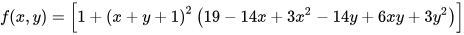

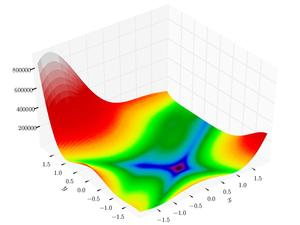

In [14]:
class Goldshteyn_Pryce_Optimization: 

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float): 

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x: list):
        function_value = ((1 + (x[0] + x[1] + 1) ** 2 * (19 - 14 * x[0] + 3 * x[0] ** 2 - 14 * x[1] + 6 * x[0] * x[1] + 3 * x[1] ** 2)) *
                           (30 + (2 * x[0] - 3 * x[1]) ** 2 * (18 - 32 * x[0] + 12 * x[0] ** 2 + 48 * x[1] - 36 * x[0] * x[1] + 27 * x[1] ** 2)))
        return [function_value]

### Табличная функция Хольдера

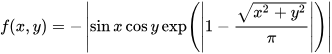

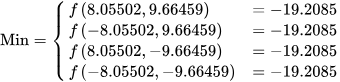

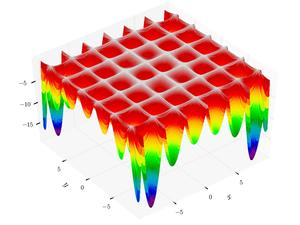

In [15]:
class Holders: 

    def __init__(self,
                 x_min: float,
                 x_max: float,
                 y_min: float,
                 y_max: float): 

        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max

    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])

    def fitness(self, x: list):
        function_value = -abs(np.sin(x[0]) * np.cos(x[1]) * np.exp(abs(1 - np.sqrt(x[0]**2 + x[1]**2) / np.pi)))
        return [function_value]

## Simple Genetic Algorithm (Простой генетический алгоритм)

In [16]:
# Опредлим проблему для функции Гольдшейна-Прайса 
problem_Gold = problem(Goldshteyn_Pryce_Optimization(-2, 2, -2, 2))
print(problem_Gold)

Problem name: <class '__main__.Goldshteyn_Pryce_Optimization'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-2, -2]
	Upper bounds: [2, 2]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [17]:
# Опредлим проблему для функции табличной функции Хольдера
problem_Holders = problem(Holders(-10, 10, -10, 10))
print(problem_Holders)

Problem name: <class '__main__.Holders'>
	C++ class name: class pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [18]:
# Размер популяции
pop_size = 100
# Параметр seed генератор
current_seed = 10
# Количество эволюционных шагов
number_of_evolutions = 30

In [19]:
# Создаем популяцию для каждой проблемы
pop_Gold = population(problem_Gold, size=pop_size, seed=current_seed)
pop_Holders = population(problem_Holders, size=pop_size, seed=current_seed)


In [20]:
pop_Gold = Evolution(sga, pop_Gold)
pop_Holders = Evolution(sga, pop_Holders)

Простой генетический алгоритм
Простой генетический алгоритм


In [21]:
def plot(problem, result, num_evols):
    
    (x_min, y_min), (x_max, y_max) = problem.get_bounds()

    # Изобразим минимизацию за все поколения
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(np.arange(1, num_evols+1), result[2], color='darkgreen', label='Значение чемпиона в поколении')

    # Выведем лучший образец
    champion_n = np.argmin(np.array(result[2]))
    ax.scatter(champion_n+1, np.min(result[2]), marker='x', color='r', label='Абсолютный чемпион')

    ax.set_xlim((1, num_evols+1))
    ax.grid('major')
    ax.set_title('Динамика эволюции', fontweight='bold')
    ax.set_xlabel('Номер поколения')
    ax.set_ylabel('Значение оптимизируемой функции')
    ax.legend(loc='upper right')
    plt.tight_layout()

    # Показ
    plt.show()

def plot_surf(prob, results):
    best_x = [ind[0] for ind in results[1]]
    best_y = [ind[1] for ind in results[1]]
    grid_points = 100
    (x_min, y_min), (x_max, y_max) = prob.get_bounds()
    x_vector = np.linspace(x_min, x_max, grid_points)
    y_vector = np.linspace(y_min, y_max, grid_points)
    x_grid, y_grid = np.meshgrid(x_vector, y_vector)
    z_grid = np.zeros((grid_points, grid_points))
    
    for i in range(x_grid.shape[1]):
        for j in range(x_grid.shape[0]):
            z_grid[i, j] = prob.fitness([x_grid[i, j], y_grid[i, j]])[0]

    fig, ax = plt.subplots(figsize=(9,5))
    cs = ax.contour(x_grid, y_grid, z_grid, 50, zorder=2)
    
    ax.scatter(best_x, best_y, marker='x', color='r', zorder=100)

    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    ax.set_title('Поверхность функции', fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    cbar = fig.colorbar(cs)
    cbar.ax.set_ylabel('Значение функции')

    plt.show()

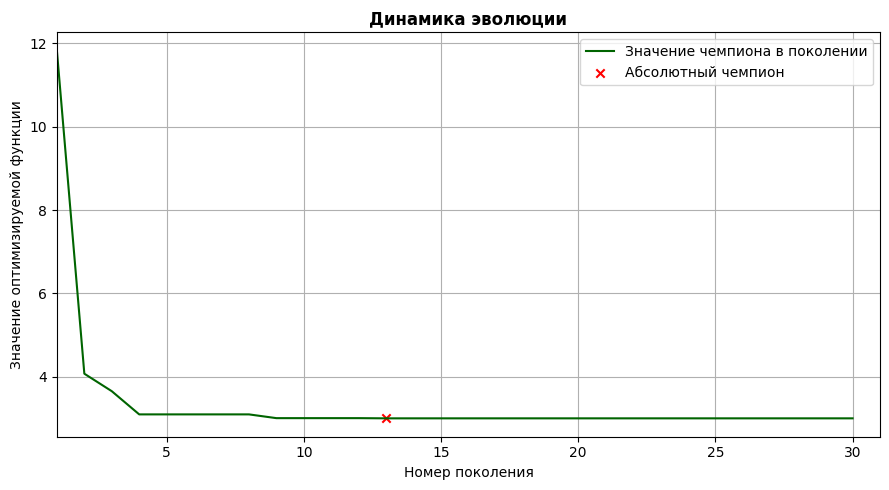

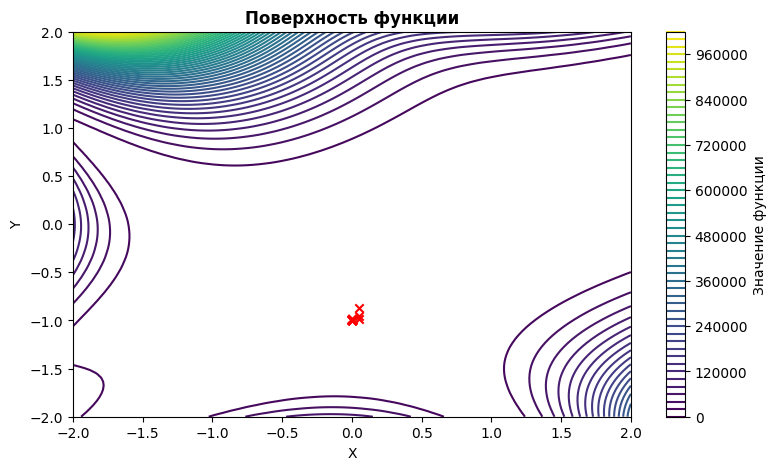

In [22]:
plot(problem_Gold, pop_Gold, number_of_evolutions)
plot_surf(problem_Gold, pop_Gold) 

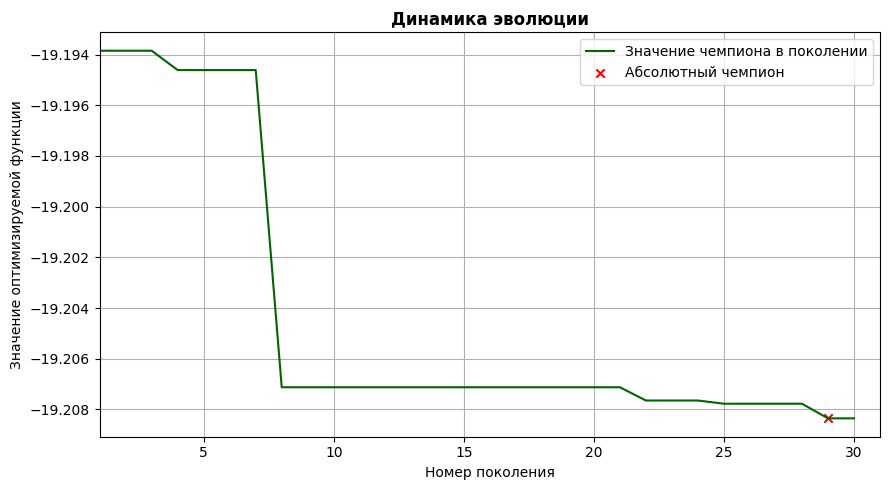

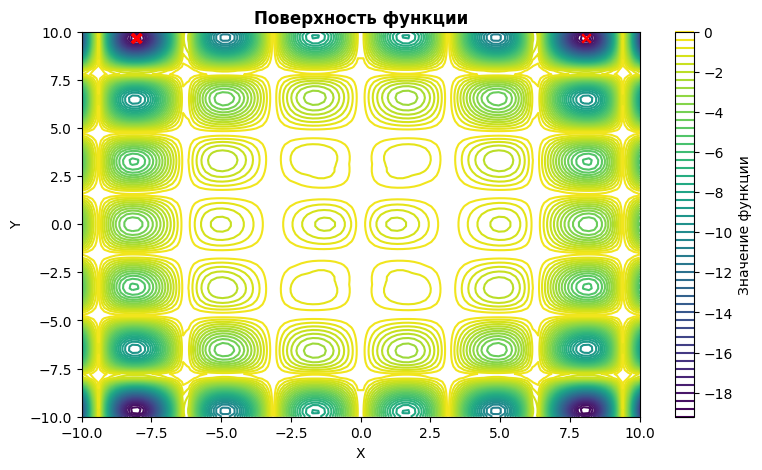

In [23]:
plot(problem_Holders, pop_Holders, number_of_evolutions)
plot_surf(problem_Holders, pop_Holders) 

<a id='gen112'></a>

In [24]:
print('Найденный минимум функции Гольдшейна-Прайса в точке:')
print(np.around(pop_Gold[0].champion_x, 5))
print('Значение функции:')
print(float(np.around(pop_Gold[0].champion_f[0], 10)))

Найденный минимум функции Гольдшейна-Прайса в точке:
[ 0.00286 -0.99946]
Значение функции:
3.001851544


In [25]:
print('Найденный минимум функции Хольдера в точке:')
print(np.around(pop_Holders[0].champion_x, 5))
print('Значение функции:')
print(float(np.around(pop_Holders[0].champion_f[0], 10)))

Найденный минимум функции Хольдера в точке:
[-8.05116  9.66521]
Значение функции:
-19.208352312


## Bee Colony Algorithm (Алгоритм пчелиной колонии)

In [26]:
# Создаем популяцию для каждой проблемы
pop_Gold_bee = population(problem_Gold, size=pop_size, seed=current_seed)
pop_Holders_bee = population(problem_Holders, size=pop_size, seed=current_seed)

In [27]:
pop_Gold_bee = Evolution(bee_colony, pop_Gold_bee)
pop_Holders_bee = Evolution(bee_colony, pop_Holders_bee)

Кто пчелок уважает...
Кто пчелок уважает...


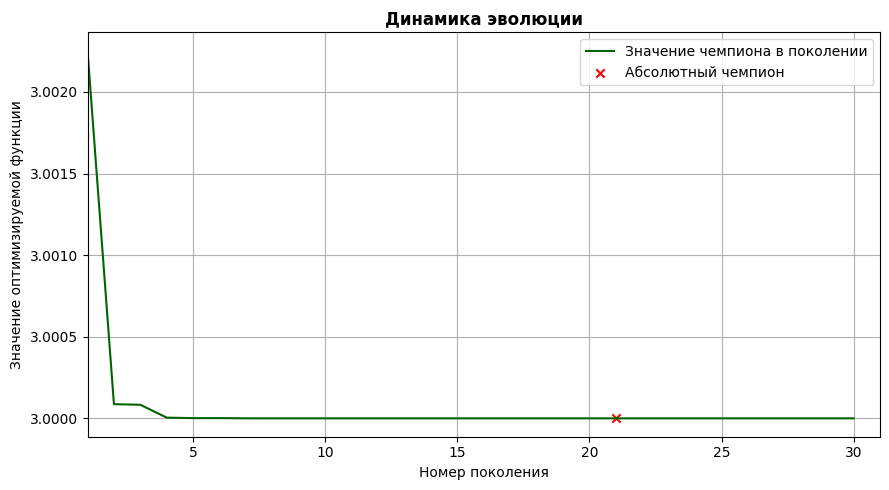

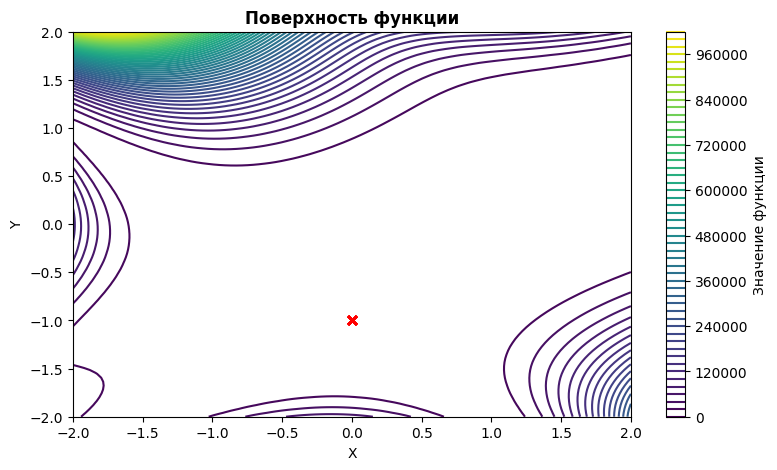

In [28]:
plot(problem_Gold, pop_Gold_bee, number_of_evolutions)
plot_surf(problem_Gold, pop_Gold_bee) 

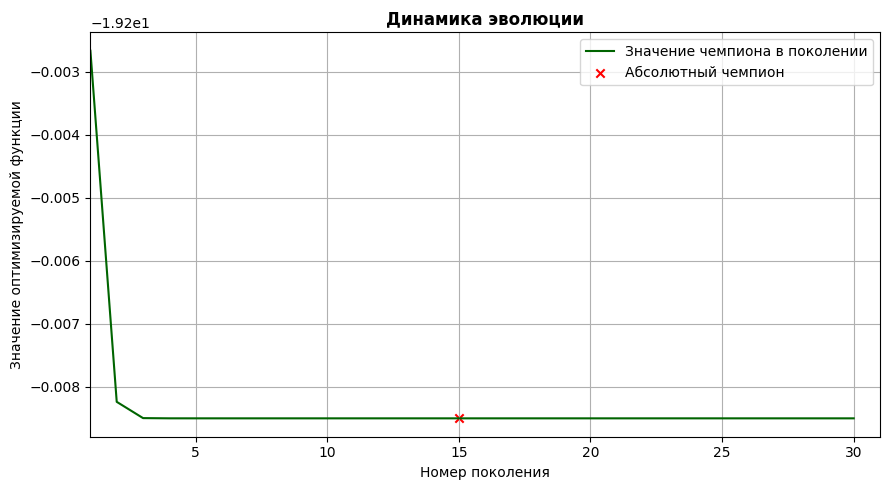

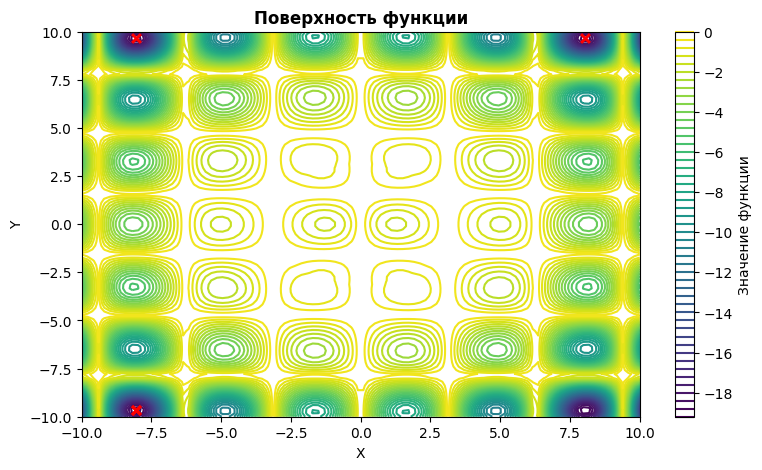

In [29]:
plot(problem_Holders, pop_Holders_bee, number_of_evolutions)
plot_surf(problem_Holders, pop_Holders_bee) 

In [30]:
print('Найденный минимум функции Гольдшейна-Прайса в точке:')
print(np.around(pop_Gold_bee[0].champion_x, 5))
print('Значение функции:')
print(float(np.around(pop_Gold_bee[0].champion_f[0], 10)))

Найденный минимум функции Гольдшейна-Прайса в точке:
[ 0. -1.]
Значение функции:
3.0


In [31]:
print('Найденный минимум функции Хольдера в точке:')
print(np.around(pop_Holders_bee[0].champion_x, 5))
print('Значение функции:')
print(float(np.around(pop_Holders_bee[0].champion_f[0], 10)))

Найденный минимум функции Хольдера в точке:
[-8.05502 -9.66459]
Значение функции:
-19.2085025679


## Self-adaptive Differential Evolution (Самоадаптивная дифференциальная эволюция)

In [34]:
# Создаем популяцию для каждой проблемы
pop_Gold_sade = population(problem_Gold, size=pop_size, seed=current_seed)
pop_Holders_sade = population(problem_Holders, size=pop_size, seed=current_seed)

In [35]:
pop_Gold_sade = Evolution(sade, pop_Gold_sade)
pop_Holders_sade = Evolution(sade, pop_Holders_sade)

Самоадаптивная дифференциальная эволюция
Самоадаптивная дифференциальная эволюция


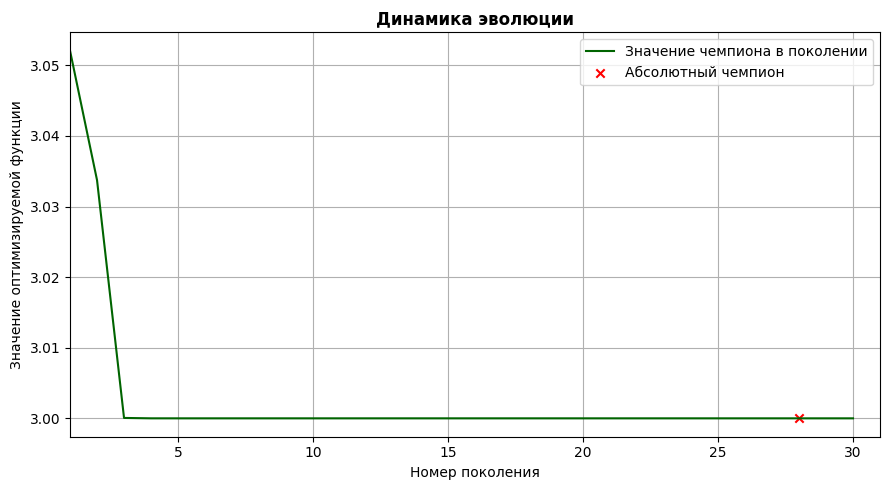

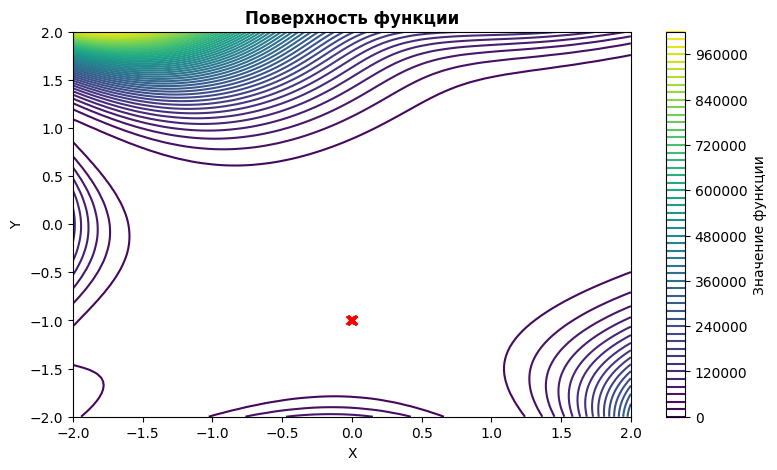

In [36]:
plot(problem_Gold, pop_Gold_sade, number_of_evolutions)
plot_surf(problem_Gold, pop_Gold_sade) 

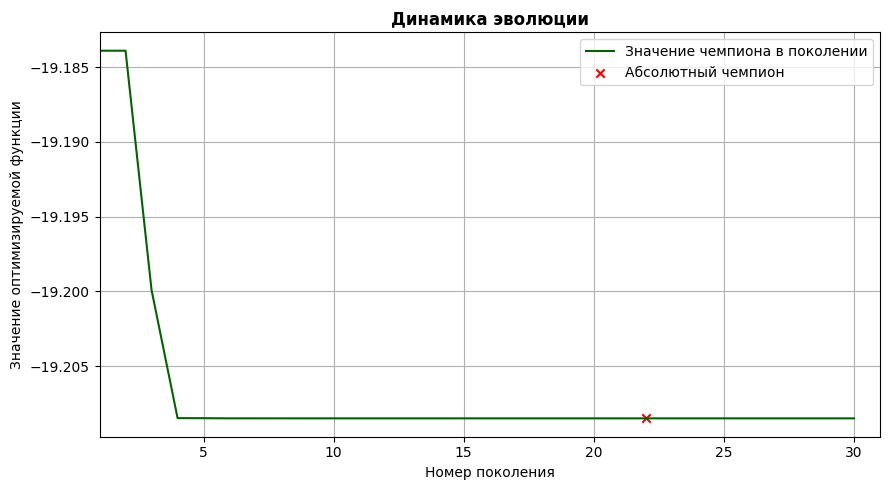

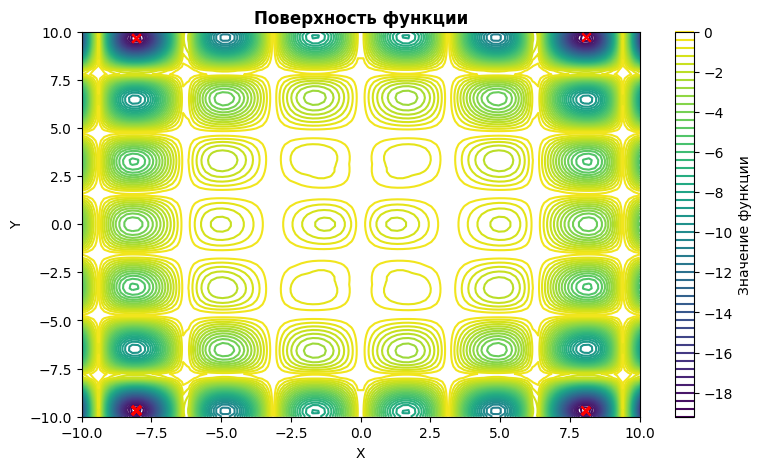

In [37]:
plot(problem_Holders, pop_Holders_sade, number_of_evolutions)
plot_surf(problem_Holders, pop_Holders_sade) 

In [38]:
print('Найденный минимум функции Гольдшейна-Прайса в точке:')
print(np.around(pop_Gold_sade[0].champion_x, 5))
print('Значение функции:')
print(float(np.around(pop_Gold_sade[0].champion_f[0], 10)))

Найденный минимум функции Гольдшейна-Прайса в точке:
[-0. -1.]
Значение функции:
3.0


In [39]:
print('Найденный минимум функции Хольдера в точке:')
print(np.around(pop_Holders_sade[0].champion_x, 5))
print('Значение функции:')
print(float(np.around(pop_Holders_sade[0].champion_f[0], 10)))
champ_Holders_sade = float(np.around(pop_Holders_sade[0].champion_f[0], 10))

Найденный минимум функции Хольдера в точке:
[-8.05502 -9.66459]
Значение функции:
-19.2085025679


In [40]:
# Создаем данные для таблицы
data = {
    'Проблема': ['Goldshteyn_Pryce', 'Goldshteyn_Pryce', 'Goldshteyn_Pryce', 'Holders','Holders','Holders'],
    'Метод': ['Self-adaptive Differential Evolution', 'Bee Colony Algorithm', 'Simple Genetic Algorithm','Self-adaptive Differential Evolution', 'Bee Colony Algorithm', 'Simple Genetic Algorithm'],
    'Найденный минимум функции': [np.around(pop_Gold_sade[0].champion_x, 5), np.around(pop_Gold_bee[0].champion_x, 5), np.around(pop_Gold[0].champion_x, 5),np.around(pop_Holders_sade[0].champion_x, 5), np.around(pop_Holders_bee[0].champion_x, 5), np.around(pop_Holders[0].champion_x, 5)],
    'Найденное значение функции': [float(np.around(pop_Gold_sade[0].champion_f[0], 10)) , float(np.around(pop_Gold_bee[0].champion_f[0], 10)) , float(np.around(pop_Gold[0].champion_f[0], 10)), float(np.around(pop_Holders_sade[0].champion_f[0], 10)) , float(np.around(pop_Holders_bee[0].champion_f[0], 10)) , float(np.around(pop_Holders[0].champion_f[0], 10))]  , 
}

df = pd.DataFrame(data)

In [41]:
print(df)

           Проблема                                 Метод  \
0  Goldshteyn_Pryce  Self-adaptive Differential Evolution   
1  Goldshteyn_Pryce                  Bee Colony Algorithm   
2  Goldshteyn_Pryce              Simple Genetic Algorithm   
3           Holders  Self-adaptive Differential Evolution   
4           Holders                  Bee Colony Algorithm   
5           Holders              Simple Genetic Algorithm   

  Найденный минимум функции  Найденное значение функции  
0              [-0.0, -1.0]                    3.000000  
1               [0.0, -1.0]                    3.000000  
2       [0.00286, -0.99946]                    3.001852  
3      [-8.05502, -9.66459]                  -19.208503  
4      [-8.05502, -9.66459]                  -19.208503  
5       [-8.05116, 9.66521]                  -19.208352  
